# Primer clustering con scikit-learn

[Curso de Clustering con Python y scikit-learn](https://platzi.com/cursos/clustering)

## Importar librerías y carga de datos de prueba

In [23]:
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
x, y, c = make_blobs(n_samples=1000, centers=4, n_features=2, cluster_std=[1,1.5,2,2], random_state=7, return_centers=True)

In [3]:
x

array([[  1.98897886,  -7.13117099],
       [  3.98353917,  -7.85082013],
       [  1.2068692 ,  -6.28647153],
       ...,
       [ -1.99277631,   4.27244383],
       [  0.27351724,   5.30653756],
       [ -0.62797928, -12.10918056]])

In [4]:
y

array([3, 3, 3, 3, 0, 0, 2, 0, 1, 1, 3, 3, 1, 1, 0, 2, 2, 2, 0, 0, 0, 3,
       2, 1, 0, 1, 2, 3, 0, 3, 0, 0, 1, 2, 3, 0, 1, 2, 1, 2, 2, 0, 1, 3,
       3, 0, 2, 0, 0, 1, 2, 1, 0, 3, 1, 2, 1, 1, 1, 1, 2, 3, 3, 0, 1, 1,
       2, 1, 3, 0, 1, 1, 1, 2, 0, 0, 3, 1, 3, 1, 0, 1, 1, 0, 0, 2, 0, 1,
       0, 1, 1, 0, 1, 3, 0, 3, 0, 2, 2, 2, 3, 3, 1, 1, 3, 3, 0, 2, 1, 2,
       1, 1, 1, 2, 0, 0, 1, 3, 3, 0, 3, 3, 0, 0, 1, 2, 2, 0, 0, 2, 1, 3,
       1, 0, 3, 2, 0, 1, 2, 3, 0, 2, 3, 1, 3, 0, 0, 3, 3, 0, 0, 3, 0, 1,
       2, 2, 2, 0, 2, 0, 2, 1, 2, 3, 3, 0, 3, 3, 3, 2, 3, 1, 0, 3, 1, 0,
       1, 1, 0, 0, 3, 1, 0, 1, 3, 3, 0, 2, 2, 0, 1, 1, 3, 2, 0, 0, 0, 1,
       1, 2, 2, 1, 3, 0, 2, 2, 2, 2, 1, 2, 0, 2, 3, 1, 2, 2, 1, 3, 0, 3,
       3, 3, 3, 1, 3, 0, 3, 1, 3, 2, 2, 0, 0, 3, 2, 1, 2, 2, 3, 0, 1, 1,
       2, 2, 3, 1, 2, 3, 3, 3, 2, 3, 2, 3, 0, 2, 3, 2, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 2, 0, 3, 2, 1, 3, 0, 0, 3, 0, 0, 2, 1, 2, 0, 1, 3, 1, 2,
       1, 2, 0, 0, 0, 3, 0, 2, 2, 0, 3, 3, 2, 0, 2,

In [5]:
df_blobs = pd.DataFrame({
    'x1': x[:,0], # le pasamos un diccionario al df
    'x2':x[:,1], 
    'y':y
})

In [6]:
print(df_blobs)

           x1         x2  y
0    1.988979  -7.131171  3
1    3.983539  -7.850820  3
2    1.206869  -6.286472  3
3    1.251456  -8.207160  3
4   -8.394337   6.121797  0
..        ...        ... ..
995 -0.881376   3.340687  1
996  9.729666   4.491100  2
997 -1.992776   4.272444  1
998  0.273517   5.306538  1
999 -0.627979 -12.109181  3

[1000 rows x 3 columns]


In [7]:
df_centers = pd.DataFrame({
    'x1': c[:,0], # le pasamos un diccionario al df
    'x2':c[:,1], 
})

## Visualizacion de datos

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


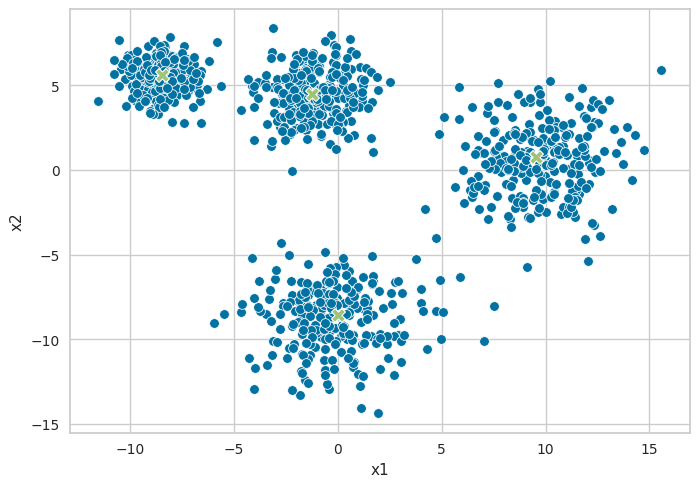

In [8]:
sns.scatterplot(data=df_blobs, x='x1', y='x2')
sns.scatterplot(data=df_centers, x='x1', y='x2', marker='X', s=100)
plt.show()


## Aplicando clustering

In [9]:
from sklearn.cluster import KMeans

In [10]:
kmeans = KMeans(n_clusters=5, random_state=7)

In [11]:
df_cluster = kmeans.fit_predict(x)
df_blobs['cluster'] = df_cluster # se crea nueva columna
k_means_centers = kmeans.cluster_centers_
df_k_means_center = pd.DataFrame( #creamos nuevo df
    { # creamos un diccionario
        'x1':k_means_centers[:, 0],
        'x2':k_means_centers[:, 1]
    }
)

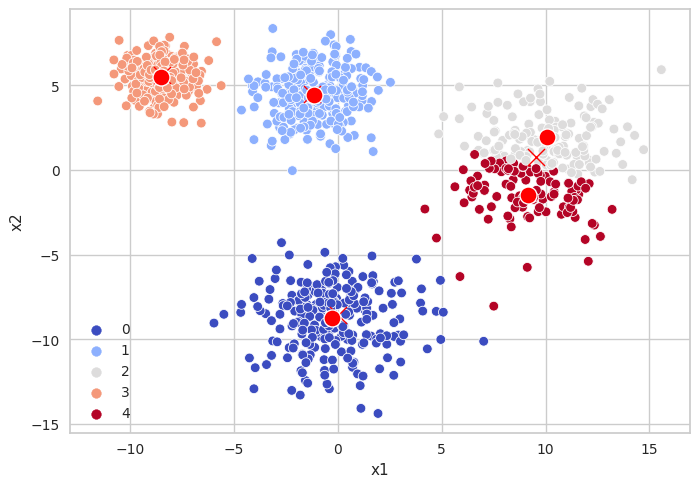

In [12]:
sns.scatterplot(data = df_blobs, x='x1', y='x2', hue='cluster', palette='coolwarm')
sns.scatterplot(data = df_centers, x='x1', y='x2', marker='x', s=150, color='red')
sns.scatterplot(data = df_k_means_center, x='x1', y='x2', marker='o', s=150, color='red')
plt.show()




# Encontrando el K adecuado con grafica de Elbow

In [13]:
def ver_clusters(k):
    kmeans = KMeans(n_clusters=k, random_state=7)
    df_cluster = kmeans.fit_predict(x)
    df_blobs['cluster'] = df_cluster # se crea nueva columna
    k_means_centers = kmeans.cluster_centers_
    df_k_means_center = pd.DataFrame( #creamos nuevo df
        { # creamos un diccionario
            'x1':k_means_centers[:, 0],
            'x2':k_means_centers[:, 1]
        }
    )

3


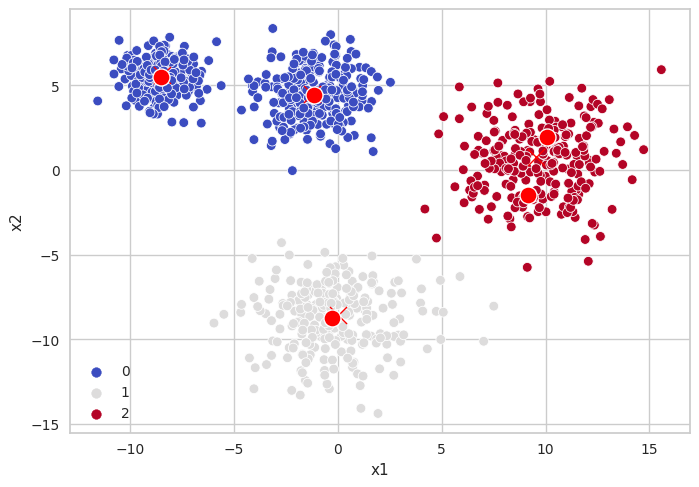

4


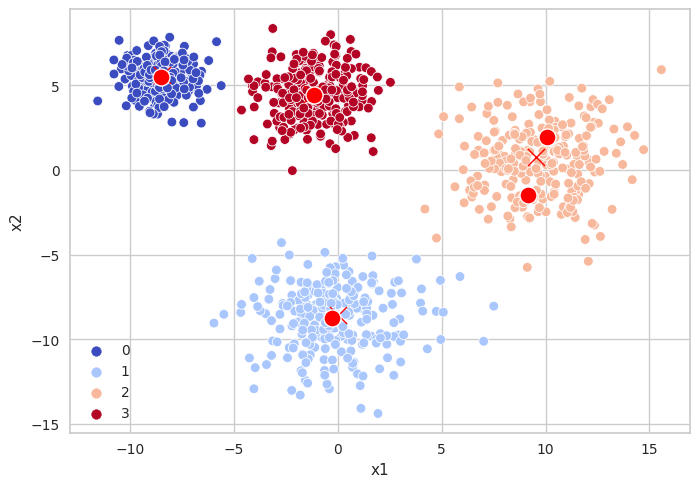

5


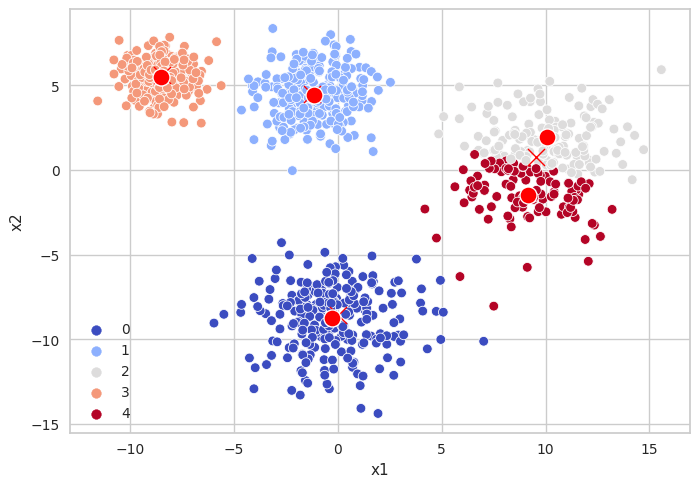

In [14]:
for _ in range(3, 6):
    print(_)
    ver_clusters(_)
    sns.scatterplot(data = df_blobs, x='x1', y='x2', hue='cluster', palette='coolwarm')
    sns.scatterplot(data = df_centers, x='x1', y='x2', marker='x', s=150, color='red')
    sns.scatterplot(data = df_k_means_center, x='x1', y='x2', marker='o', s=150, color='red')
    plt.show()


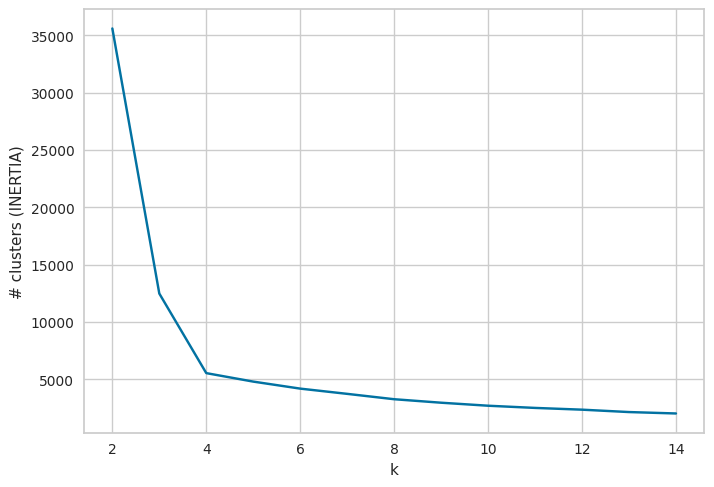

In [15]:
sum_of_squared_distances = []
K = range(2, 15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(x)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('# clusters (INERTIA)')
plt.show()   

### Silhouette Score

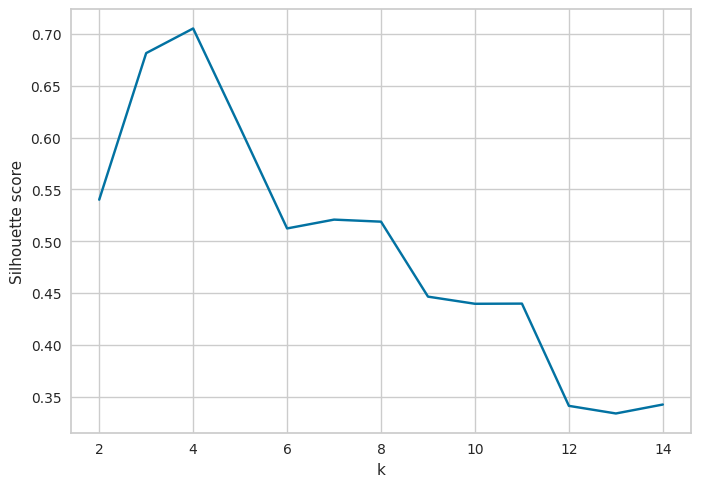

In [16]:
# El punto mas alto nos dice cual es el K mas optimo
silhouette_scores = []
K = range(2, 15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(x)
    y = km.predict(x)
    silhouette_scores.append(silhouette_score(x, y))

plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()   

### Evaluar el resultado del clusteringm

In [17]:
from yellowbrick.cluster import SilhouetteVisualizer

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(n_clusters=4))

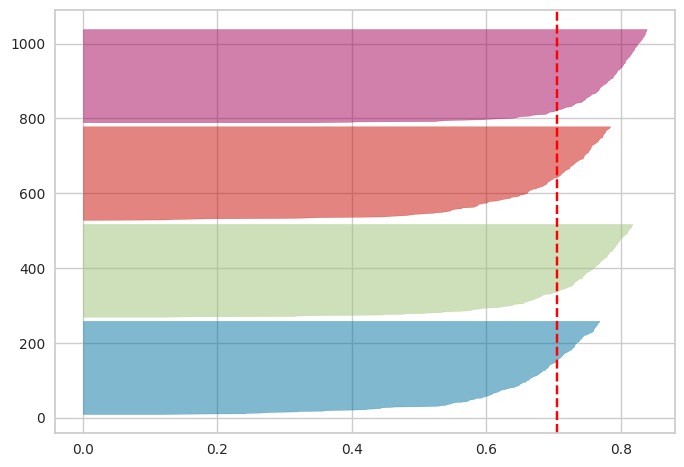

In [18]:
km = KMeans(n_clusters=4)
visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick')
visualizer.fit(x)

## Hierarchical clustering algoritmo aglomerativo (Jerarquico)

In [26]:
X, y, c = make_blobs(500, cluster_std=0.8, centers=4, n_features=2,return_centers=True)

df_blobs = pd.DataFrame(
{
    'x1': X[:, 0],
    'x2': X[:, 1],
    'y': y
})

df_centers = pd.DataFrame(
{
    'x1': c[:, 0],
    'x2': c[:, 1], 
})

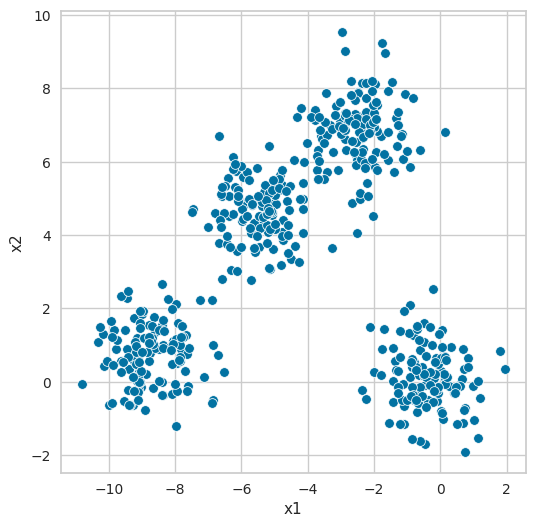

In [28]:
fig = plt.figure(figsize=(6,6))
sns.scatterplot(data = df_blobs, x= 'x1', y = 'x2')
plt.show()

# Dendrograma

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


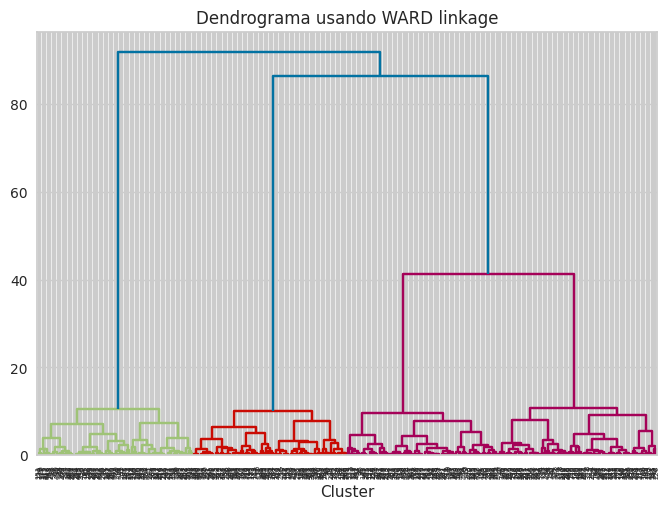

In [30]:
dendrogram_plot = dendrogram(linkage(X, method = 'ward'))
plt.title('Dendrograma usando WARD linkage')
plt.xlabel('Cluster')
plt.xlabel('Distancia euclideana') #viene por defecto
plt.show()

**Podemos tener hasta 4 cludters**

## Clustering aglomerativo

In [31]:
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [32]:
df_blobs['cluster'] = y_hc

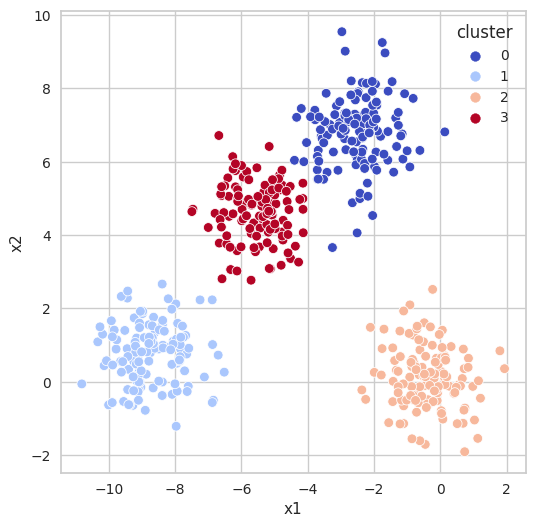

In [33]:
fig = plt.figure(figsize=(6,6))
sns.scatterplot(data = df_blobs, x= 'x1', y = 'x2', hue = 'cluster', palette = 'coolwarm')
plt.show()

# Evaluando los resultados del jerarquical clustering

### Indice de silueta

In [35]:
silhouette_score(X, y_hc)

0.6712020402484947

Ya que no contamos con centroides(como anteriormente), usamos la siguiente funcion:
https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

For n_clusters = 3 The average silhouette_score is : 0.6712020402484947
For n_clusters = 4 The average silhouette_score is : 0.6712020402484947
For n_clusters = 5 The average silhouette_score is : 0.6712020402484947


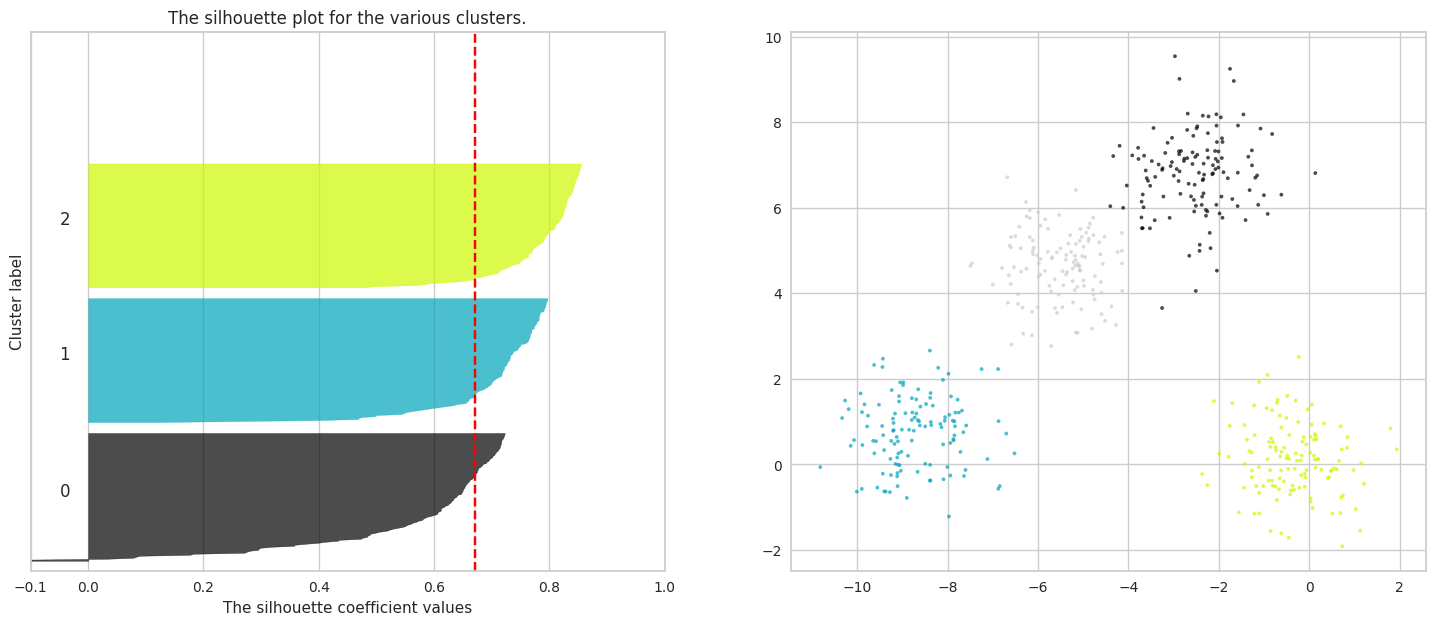

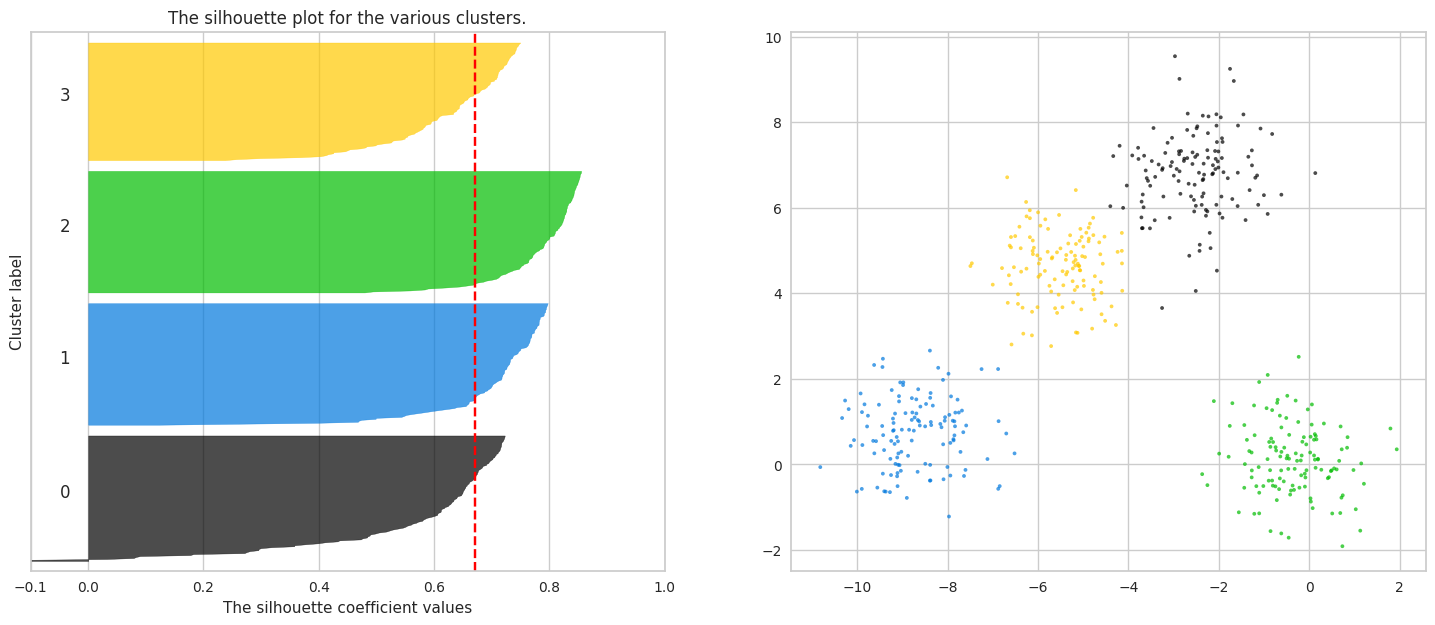

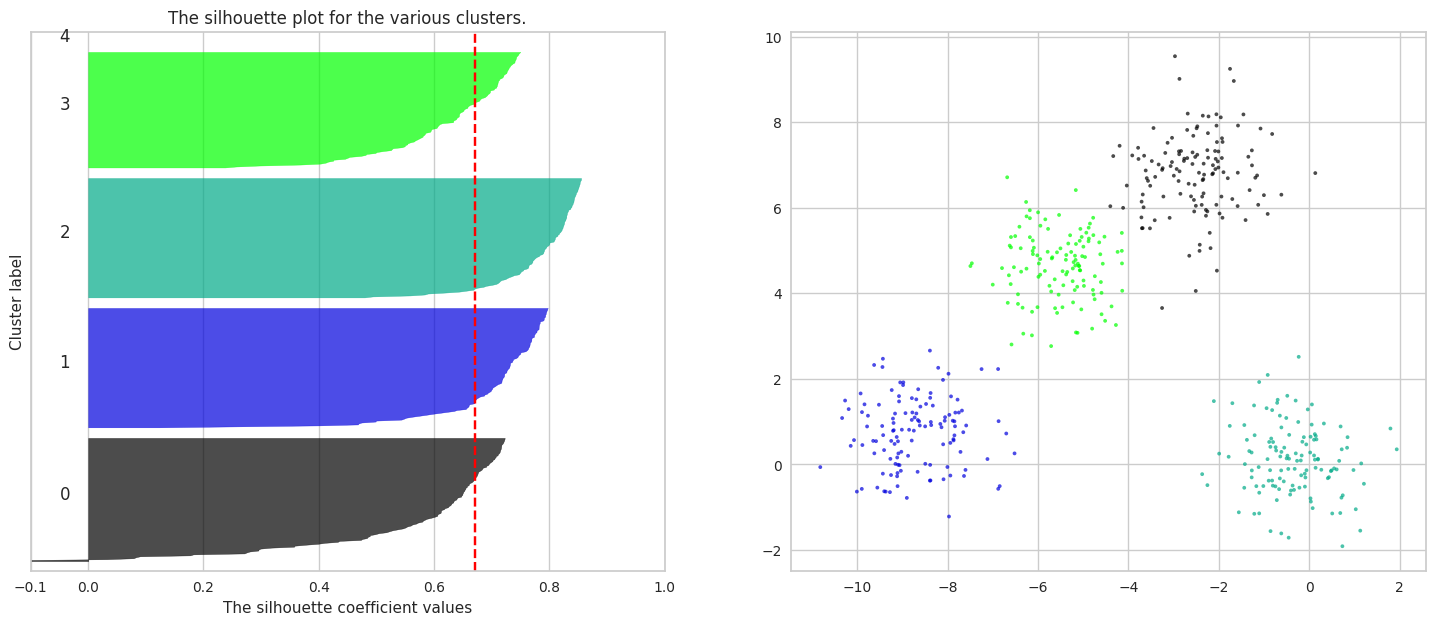

In [40]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


range_n_clusters = [3, 4, 5]  #[2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.

    clusterer = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
    cluster_labels = hc.fit_predict(X)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )



plt.show()

# DBSCAN

- Basado en densidades

- Funciona con otro tipo de patrones (K means funciona con centroides->circunferencias)

- Por ejemplo espirales, cuadros, triangulos

- Aveces K means puede funcionar mejor

In [45]:
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import DBSCAN

In [81]:
X, y, c = make_blobs(1000, cluster_std=0.8, centers=5, n_features=2,return_centers=True)

df_blobs = pd.DataFrame(
{
    'x1': X[:, 0],
    'x2': X[:, 1],
    'y': y
})

df_centers = pd.DataFrame(
{
    'x1': c[:, 0],
    'x2': c[:, 1], 
})

In [75]:
X_m, y_m = make_moons(750, noise=0.05, random_state=42)

df_moons = pd.DataFrame(
{
    'x1': X_m[:, 0],
    'x2': X_m[:, 1],
})

## Visualizacion de datos

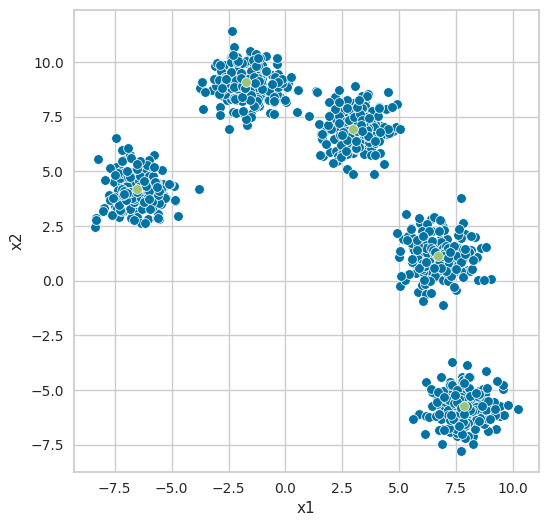

In [82]:
fig = plt.figure(figsize=(6,6))
sns.scatterplot(data = df_blobs, x= 'x1', y = 'x2', palette = 'coolwarm')
sns.scatterplot(data = df_centers, x= 'x1', y = 'x2', palette = 'coolwarm')
plt.show()

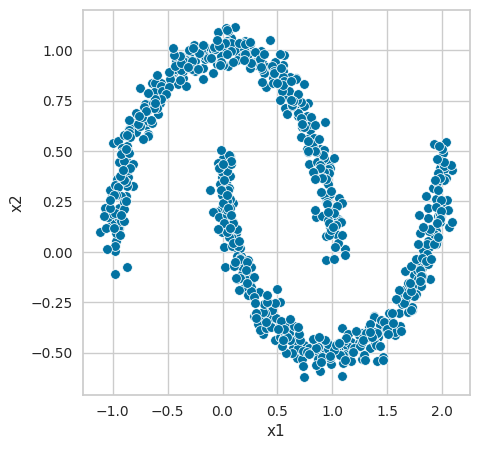

In [72]:
fig = plt.figure(figsize=(5,5))
sns.scatterplot(data = df_moons, x= 'x1', y = 'x2', palette = 'coolwarm')
plt.show()

## Implementando DBSCAN

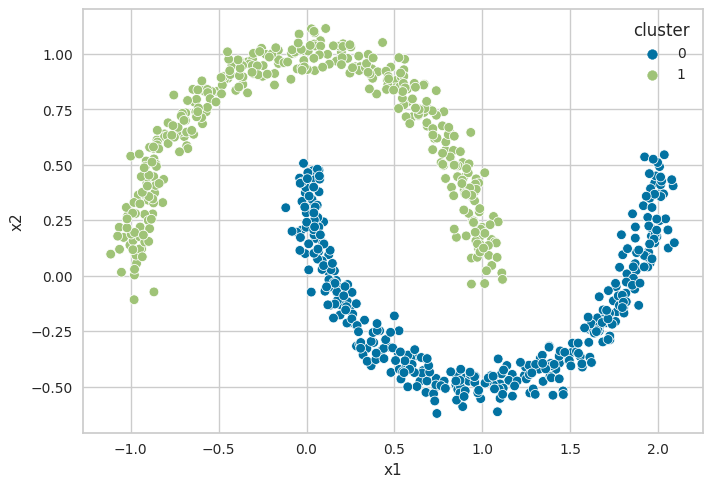

In [76]:
dbscan_cluster = DBSCAN(eps=0.3, min_samples=3)
y_m_predict = dbscan_cluster.fit_predict(X_m)
df_moons['cluster'] = y_m_predict
sns.scatterplot(data=df_moons, x='x1', y='x2', hue = 'cluster')
plt.show()

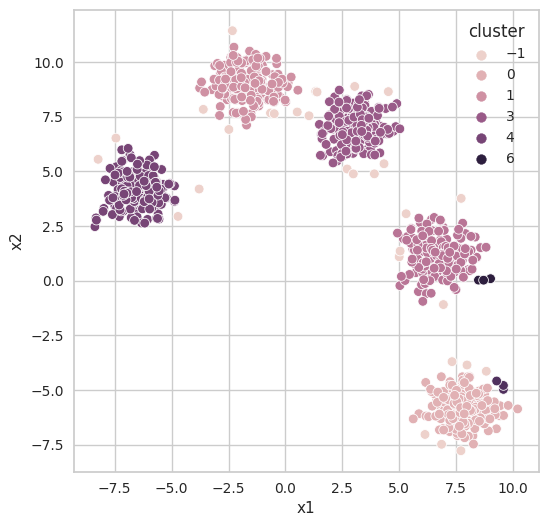

In [84]:
dbscan_cluster = DBSCAN(eps=0.5, min_samples=3)
y_m_predict = dbscan_cluster.fit_predict(X)
df_blobs['cluster'] = y_m_predict

fig = plt.figure(figsize=(6,6))
sns.scatterplot(data = df_blobs, x= 'x1', y = 'x2', hue = 'cluster')
plt.show()


### Como configurar los hiperparametros para obtener los mejores resultados

In [87]:
from sklearn.neighbors import NearestNeighbors

In [105]:
vecinos = NearestNeighbors(n_neighbors=3)
vecinos_fit = vecinos.fit(X)
distances, indices = vecinos_fit.kneighbors(X)

#### tecnica de la rodilla

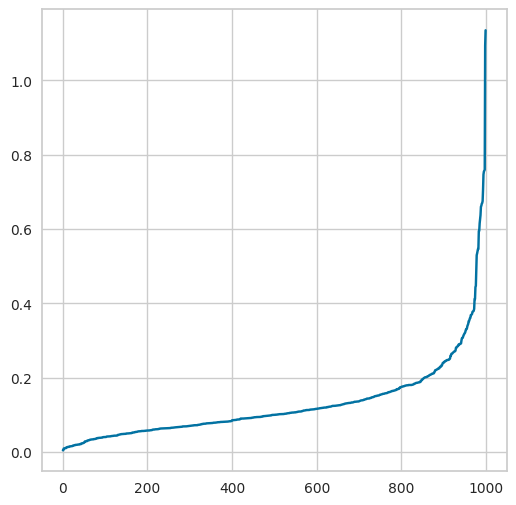

In [106]:
# sol vamos a ordenar las distancias!
distances_ = np.sort(distances, axis= 0)
distances = distances_[:,1]
fig = plt.figure(figsize=(6,6))
plt.plot(distances)

##### seleccionamos la rodilla

In [108]:
eps_values = np.arange(.25, 0.8, 0.1)
min_samples = np.arange(2, 10)

In [109]:
from itertools import product

In [116]:
dbscan_params = list(product(eps_values, min_samples))
silouete_scores = []

for p in dbscan_params:
    y_pred = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(X)
    silouete_scores.append(silhouette_score(X, y_pred))

In [120]:
df_params_tunning = pd.DataFrame.from_records(dbscan_params, columns = ['Eps', 'Min_samples'])
df_params_tunning['sil_scores'] = silouete_scores

In [124]:
# pivoteamos la tabla
pivote = pd.pivot_table(df_params_tunning, values = 'sil_scores', index = 'Min_samples', columns = 'Eps')

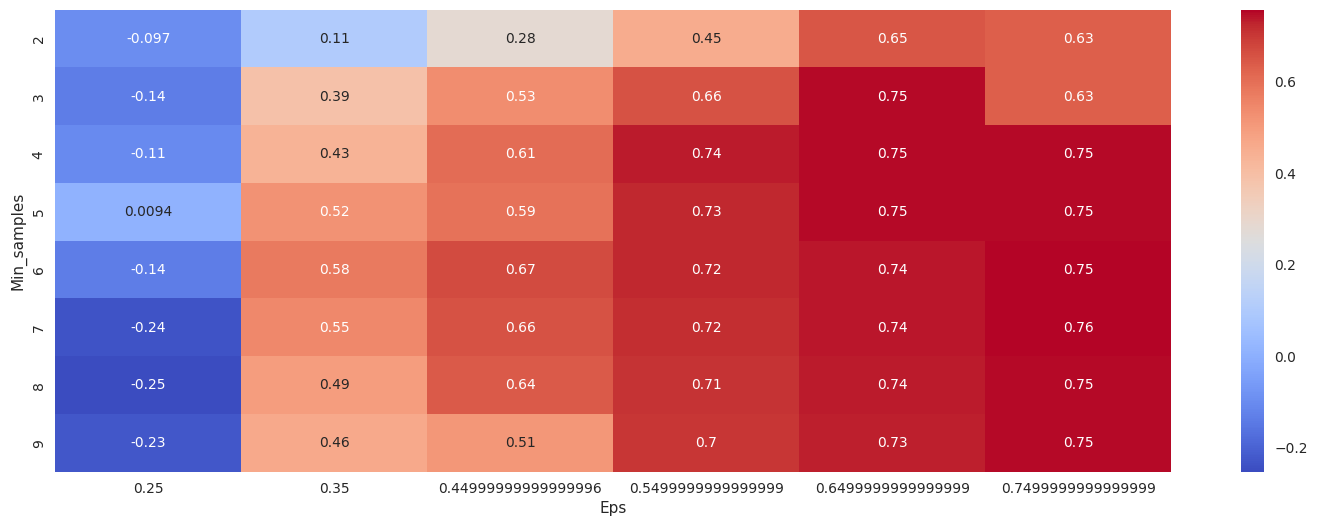

In [127]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivote, annot = True, annot_kws = {'size':10}, cmap='coolwarm', ax=ax)
plt.show()

#### Los puntos mas rojos indican un mejor desempeño deñ indice de silueta

## Evaluando los resultados de DBSCAN

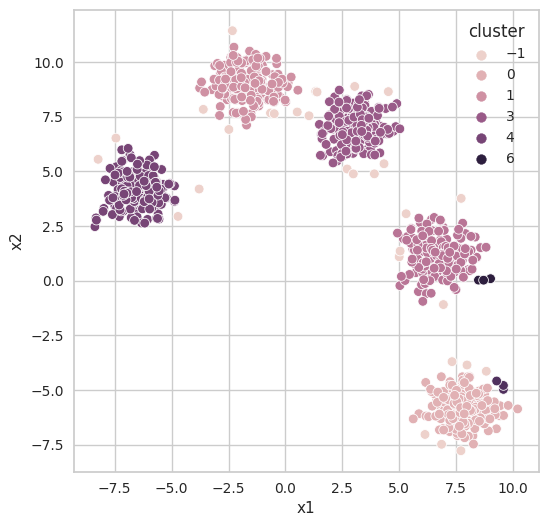

In [130]:
dbscan_cluster = DBSCAN(eps = 0.5, min_samples = 3)
y_predict = dbscan_cluster.fit_predict(X)
df_blobs['cluster'] = y_predict

fig = plt.figure(figsize=(6,6))
sns.scatterplot(data = df_blobs, x= 'x1', y = 'x2', hue = 'cluster')
plt.show()


## Evaluando

For n_clusters = 9 The average silhouette_score is : 0.027623854843772763


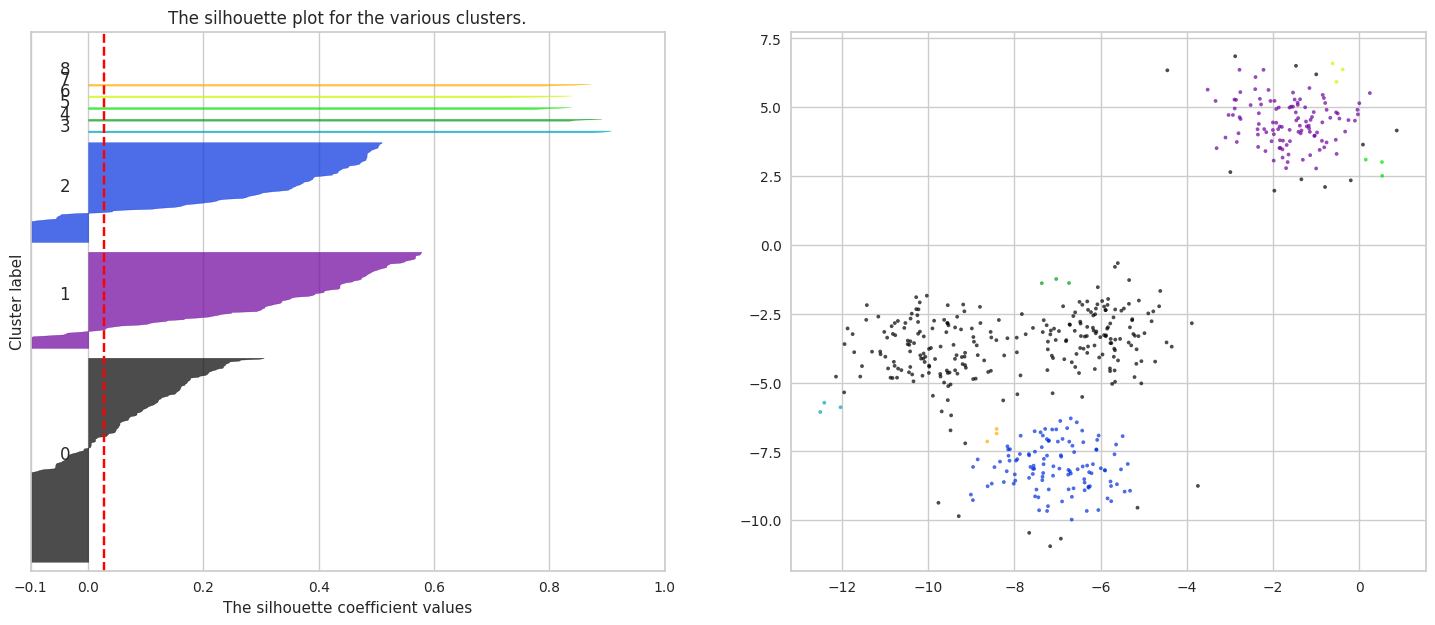

In [131]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in [1]:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    clusterer = DBSCAN(eps = 0.5, min_samples = 3)
    cluster_labels = clusterer.fit_predict(X)
    n_clusters = len(np.unique(cluster_labels))
    
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = DBSCAN(eps = 0.5, min_samples = 3)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

plt.show()